## KernelDensity Estimation 
## Gaussian Mixer Model
## Baysian Non-paramtric Estimation

<br> Submitted by : Md Juber Rahman
<br>Data Source: Sleep Health Heart Study Dataset
<br>Disclaimer: Original code has been collected from Rakib Al Fahad, EECE, UofM https://github.com/rakibalfahad/PR_Class/blob/master/KNNDensityEstimation.ipynb

In [1]:
# Import library
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [32]:
import platform
platform.uname()

uname_result(system='Windows', node='ES209D10', release='7', version='6.1.7601', machine='AMD64', processor='Intel64 Family 6 Model 37 Stepping 5, GenuineIntel')

(2651,)


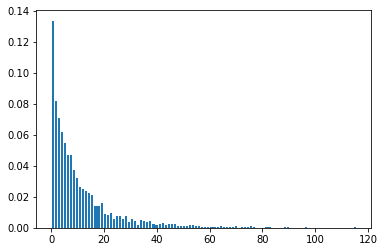

In [3]:
#load Date
data=np.loadtxt("C:/Users/mrahman8/Desktop/Fall2018/Pattern Reco/datasetSHHS.txt")
print(data.shape)
# inspect histogram of loaded dataset 
hist,bins=np.histogram(data,bins=100,range=(np.min(data),np.max(data)),density=True)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

# Plot histogram of loaded data
plt.bar(center, hist, align='center', width=width)
plt.show()
#N=1000 # Number of Sample size
# take 70% data with mean=5, sigma=1
# take 50% data with mean=0, sigma=1
#Dist1 =np.random.normal(0, 1, int(0.3 * N))
#Dist2 = np.random.normal(5, 1, int(0.7 * N))
# DistCom is the combination of two distribution
#DistCom=np.concatenate((np.random.normal(0, 1, int(0.3 * N)),np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

## Plot the distribution 
Use seaborn library to get awesome transparent plots

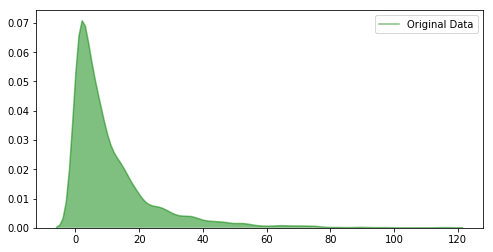

In [4]:
fig, ax1=plt.subplots(nrows=1,ncols=1,figsize=(8,4))
#sns.distplot(Dist1, hist=False, rug=False,color='b', label="Dist1",kde_kws={"shade": True,'alpha':0.1},ax=ax1);
#sns.distplot(Dist2, hist=False, rug=False,color='red',label="Dist2", ax=ax1,kde_kws={"shade": True,'alpha':0.1});
sns.distplot(data, hist=False, rug=False,color='green',label="Original Data", ax=ax1,kde_kws={"shade": True,'alpha':0.5});

Implementation of Gaussian kernel 

Text(10,0.07,'Gaussian Kernel Density')

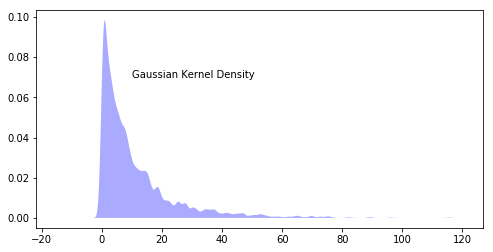

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

#----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
mu1=0
sigma1=1
mu2=5
sigma2=1
#X = np.concatenate((np.random.normal(mu1, sigma1, 1000),np.random.normal(mu1, sigma1, 1000)))[:, np.newaxis]
X=data.reshape(-1,1)

X_plot = np.linspace(-15, 120, 1000)[:, np.newaxis]
bins = np.linspace(-15, 120, 10)

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(8,4))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# # Gaussian KDE
X_plot = np.linspace(-15, 120, 1000)[:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax.text(10, 0.07, "Gaussian Kernel Density")

Density estimation walks the line between unsupervised learning, feature engineering, and data modeling. Some of the most popular and useful density estimation techniques are mixture models such as Gaussian Mixtures (sklearn.mixture.GaussianMixture), and neighbor-based approaches such as the kernel density estimate (sklearn.neighbors.KernelDensity). Gaussian Mixtures are discussed more fully in the context of clustering, because the technique is also useful as an unsupervised clustering scheme.

## Here we will see the example of 1D KDE

# Effect of Number of Sample

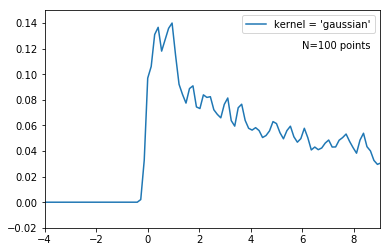

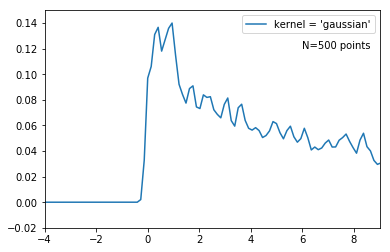

In [16]:
# Plot a 1D density example
N1= [100,500]
for N in N1: 
    np.random.seed(1)
    #X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
    dataS=np.random.choice(data, N1)
    X=dataS.reshape(-1,1)
    X_plot = np.linspace(-15, 120, 1000)[:, np.newaxis]

    #true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

    fig, ax = plt.subplots()
    #ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,label='input distribution')

    for kernel in ['gaussian']:
        kde = KernelDensity(kernel=kernel, bandwidth=0.1).fit(X)
        log_dens = kde.score_samples(X_plot)
        ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
                label="kernel = '{0}'".format(kernel))

    ax.text(6, 0.12, "N={0} points".format(N))

    ax.legend(loc='upper right')
    #ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

    ax.set_xlim(-1,120)
    ax.set_ylim(-0.02, 0.15)
plt.show()

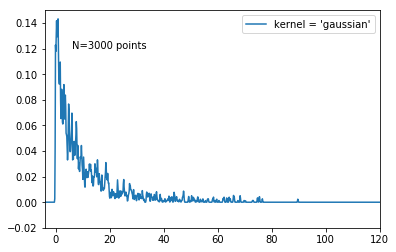

In [21]:
N1= [3000]
for N in N1: 
    np.random.seed(1)
    #X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
    dataS=np.random.choice(data, N1)
    X=dataS.reshape(-1,1)
    X_plot = np.linspace(-15, 120, 1000)[:, np.newaxis]

    #true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

    fig, ax = plt.subplots()
    #ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,label='input distribution')

    for kernel in ['gaussian']:
        kde = KernelDensity(kernel=kernel, bandwidth=0.1).fit(X)
        log_dens = kde.score_samples(X_plot)
        ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
                label="kernel = '{0}'".format(kernel))

    ax.text(6, 0.12, "N={0} points".format(N))

    ax.legend(loc='upper right')
    #ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

    ax.set_xlim(-4,120)
    ax.set_ylim(-0.02, 0.15)
plt.show()

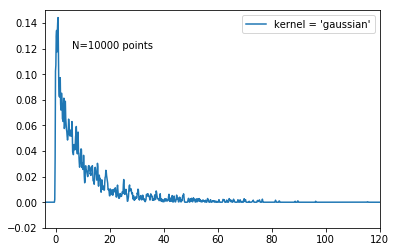

In [23]:
N1= [10000]
for N in N1: 
    np.random.seed(1)
    #X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
    dataS=np.random.choice(data, N1)
    X=dataS.reshape(-1,1)
    X_plot = np.linspace(-15, 120, 1000)[:, np.newaxis]

    #true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

    fig, ax = plt.subplots()
    #ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,label='input distribution')

    for kernel in ['gaussian']:
        kde = KernelDensity(kernel=kernel, bandwidth=0.1).fit(X)
        log_dens = kde.score_samples(X_plot)
        ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
                label="kernel = '{0}'".format(kernel))

    ax.text(6, 0.12, "N={0} points".format(N))

    ax.legend(loc='upper right')
    #ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

    ax.set_xlim(-4,120)
    ax.set_ylim(-0.02, 0.15)
plt.show()

# Change Bandwidth (with N=2500)

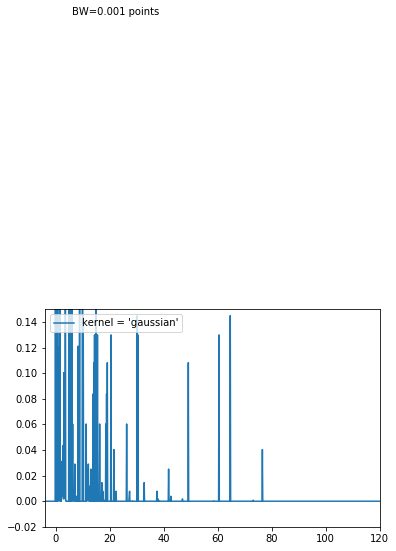

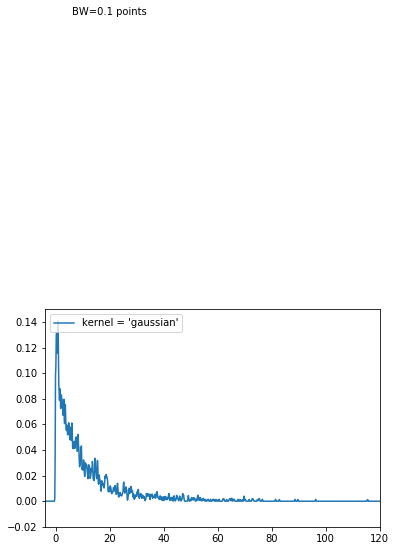

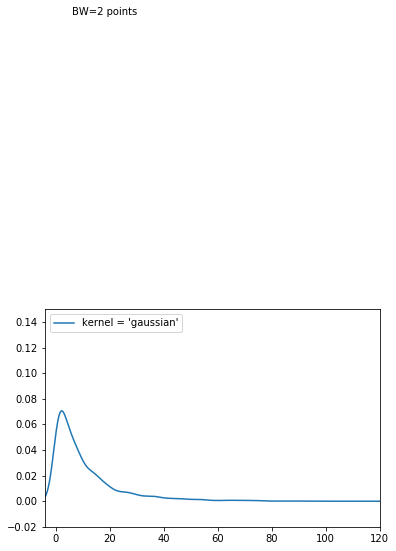

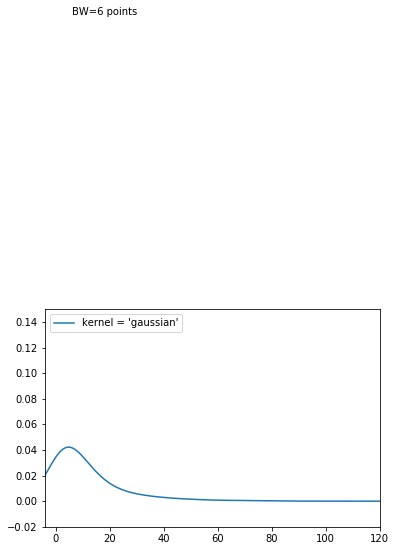

In [27]:
# Plot a 1D density example
N1= 2500
BW=[0.001,0.1,2,6]

for B in BW: 
    np.random.seed(1)
    #X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
    X=data.reshape(-1,1)
    X_plot = np.linspace(-15, 120, 1000)[:, np.newaxis]

    #true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])+ 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

    fig, ax = plt.subplots()
    #ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,label='input distribution')

    for kernel in ['gaussian']:
        kde = KernelDensity(kernel=kernel, bandwidth=B).fit(X)
        log_dens = kde.score_samples(X_plot)
        ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
                label="kernel = '{0}'".format(kernel))

    #ax.text(6, 0.38, "N={0} points".format(N))
    ax.text(6, 0.38, "BW={0} points".format(B))

    ax.legend(loc='upper left')
    #ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

    ax.set_xlim(-4,120)
    ax.set_ylim(-0.02, 0.15)
plt.show()

# Change Karnel Sample size (with N=1500, BW=0.5)

In [ ]:
# Plot a 1D density example
N= 1500
BW=0.5
KS=[5,10,100,300,1000]

for k in KS: 
    np.random.seed(1)
    #X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
    X=data.reshape(-1,1)
    X_plot = np.linspace(-5, 10, k)[:, np.newaxis]

    true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
                 + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

    fig, ax = plt.subplots()
    ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
            label='input distribution')

    for kernel in ['gaussian']:
        kde = KernelDensity(kernel=kernel, bandwidth=BW).fit(X)
        log_dens = kde.score_samples(X_plot)
        ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
                label="kernel = '{0}'".format(kernel))

    #ax.text(6, 0.38, "N={0} points".format(N))
    ax.text(6, 0.38, "KS={0} points".format(k))

    ax.legend(loc='upper left')
    #ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

    ax.set_xlim(-15, 120)
    ax.set_ylim(-0.02, 0.8)
plt.show()

# Gaussian mixture model (GMM)

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

### Selecting the number of components in a classical Gaussian Mixture Model


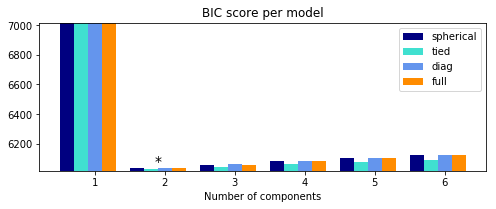

In [113]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture



# Number of samples per component
n_samples = 1500
N=1500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])

X=np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                        np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)


In [126]:
print "The cluster means are: "
print clf.means_

print "The cluster coverience are: "
print clf.covariances_

[[ 4.98699324]
 [-0.01528118]]
[[0.96788226]]


## Estimation algorithm: variational inference

In [163]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.datasets import make_blobs

from sklearn.mixture import BayesianGaussianMixture
# centers = [(-5, -5), (0, 0), (5, 5)]
# X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
#                   centers=centers, shuffle=False, random_state=42)
N=10000
X=np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                        np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]


BNPY=BayesianGaussianMixture(
        weight_concentration_prior_type="dirichlet_distribution",
        n_components=6, reg_covar=0, init_params='random',
        max_iter=1500, mean_precision_prior=.8,
        random_state=42,
        verbose=1, 
        verbose_interval=10)
BNPY.fit(X)

Initialization 0
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
  Iteration 120
  Iteration 130
  Iteration 140
  Iteration 150
  Iteration 160
  Iteration 170
  Iteration 180
  Iteration 190
  Iteration 200
  Iteration 210
  Iteration 220
  Iteration 230
  Iteration 240
  Iteration 250
  Iteration 260
  Iteration 270
  Iteration 280
  Iteration 290
  Iteration 300
  Iteration 310
  Iteration 320
  Iteration 330
  Iteration 340
  Iteration 350
  Iteration 360
  Iteration 370
  Iteration 380
  Iteration 390
  Iteration 400
  Iteration 410
  Iteration 420
  Iteration 430
  Iteration 440
  Iteration 450
  Iteration 460
  Iteration 470
  Iteration 480
  Iteration 490
  Iteration 500
  Iteration 510
  Iteration 520
  Iteration 530
  Iteration 540
  Iteration 550
  Iteration 560
  Iteration 570
  Iteration 580
  Iteration 590
  Iteration 600
  Iteration 610
  

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='random',
            max_iter=1500, mean_precision_prior=0.8, mean_prior=None,
            n_components=6, n_init=1, random_state=42, reg_covar=0,
            tol=0.001, verbose=1, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_distribution')

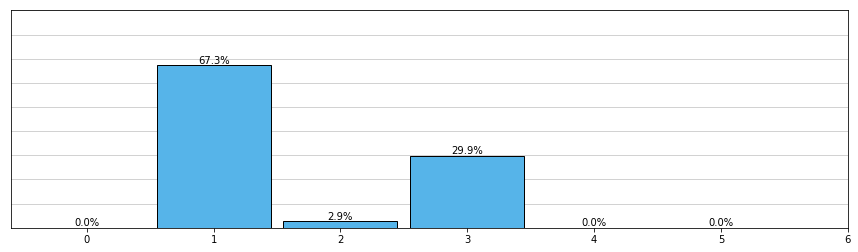

In [164]:
## Plot cluster probability

fig,ax2 = plt.subplots(1,1, figsize=(15,4))
n_components=6
index = np.arange(n_components)

ax2.yaxis.grid(True, alpha=0.7)
for k, w in enumerate(BNPY.weights_):
    ax2.bar(k, w, width=0.9, color='#56B4E9', zorder=3,
            align='center', edgecolor='black')
    ax2.text(k, w + 0.007, "%.1f%%" % (w * 100.),
             horizontalalignment='center')
ax2.set_xlim(-.6, n_components)
ax2.set_ylim(0., 0.9)
ax2.tick_params(axis='y', which='both', left='off',
                right='off', labelleft='off')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

ax2.tick_params(axis='x', which='both', top='off')

In [130]:
print "The cluster means are: "
BNPY.means_

array([[4.99045415e+00],
       [1.40328311e-03],
       [3.47951336e+00],
       [3.47951336e+00],
       [3.47951331e+00],
       [3.47951336e+00]])

In [131]:
print "The coveriance are: "
BNPY.covariances_

array([[[0.95165534]],

       [[1.0531607 ]],

       [[6.2398521 ]],

       [[6.2398521 ]],

       [[6.23985164]],

       [[6.2398521 ]]])

## EM algorithom 

In [3]:
# Generate Gaussian data like as before

N=1000 # Number of Sample size
# take 70% data with mean=5, sigma=1
# take 50% data with mean=0, sigma=1
Dist1 =np.random.normal(0, 1, int(0.3 * N))
Dist2 = np.random.normal(5, 1, int(0.7 * N))
# DistCom is the combination of two distribution
DistCom=np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]


UsageError: Line magic function `%watermark` not found.
